# Dogs vs Cats - version 2
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개 (일부만가져옴)
### one hot encoding -> logistic regression
### data shuffling
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
path='dogs-vs-cats/train/'

## Train Set 만들기

In [5]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [6]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))  # 몇 개가 있는지 알려줌

1111

In [7]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img) # 이미지를 읽고
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY) # BGR2GRAY로 가져옴
    dog = cv2.resize(dog, (ROW, COL)) # 96x96으로 사이즈변경
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [8]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [9]:
classes = ['dog', 'cat']

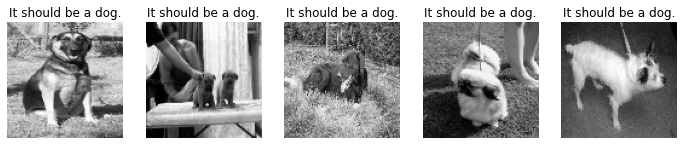

In [10]:
# 제대로 들어갔는지 확인
# conda install pillow

plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

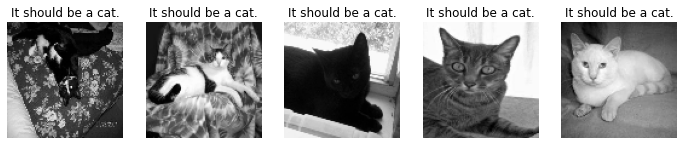

In [11]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [12]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [13]:
y_dogs[:5], y_cats[:5]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

In [14]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models

# 0에서 1까지의 값으로 바꿈
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [15]:
X_train = np.concatenate((dogs, cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [16]:
len(X_train)

2222

In [17]:
# ## One-Hot Encoding
# y_train = tf.keras.utils.to_categorical(y_train, 2)

In [18]:
X_train.shape, y_train.shape

((2222, 96, 96, 1), (2222,))

## test set (dog.12*, cat.12*) 만들기

In [19]:
dogs, cats = [], []
y_dogs, y_cats = [], []

In [20]:
dog_path = os.path.join(path, 'dog.12*')
len(glob(dog_path)) 

611

In [21]:
## Load some our cat images (611 개 이미지)
dog_path = os.path.join(path, 'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img) # 이미지를 읽고
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY) # BGR2GRAY로 가져옴
    dog = cv2.resize(dog, (ROW, COL)) # 96x96으로 사이즈변경
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [22]:
## Load some our cat images (611 개 이미지)
cat_path = os.path.join(path, 'cat.12*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [23]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [24]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models

# 0에서 1까지의 값으로 바꿈
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [25]:
dogs.shape

(611, 96, 96, 1)

In [26]:
X_test = np.concatenate((dogs, cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [27]:
len(X_test)

1222

In [28]:
# ## One-Hot Encoding
# y_test = tf.keras.utils.to_categorical(y_test, 2)

In [29]:
X_train.shape, y_train.shape

((2222, 96, 96, 1), (2222,))

### 모델설정

In [30]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1),
           activation='relu'), # 32를 3x3로, 패딩이 same이므로 결과가 똑같게, (96,96,1)
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),# 48x48이 됨
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)), # 24x24이 됨
    Dropout(.25),
    Flatten(), # 다곱함
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

In [31]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])
# from tensorflow.keras.optimizers import Adam 하면 optimizer=Adam()로 가능!

In [32]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn2-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### 모델 학습

In [33]:
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_split=0.2,
          shuffle = True,
          callbacks=[checkpointer, early_stopping_callback])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.7224 - accuracy: 0.6091
Epoch 00001: val_loss improved from inf to 0.90156, saving model to model/dogs_vs_cats-cnn2-01-0.9016.hdf5
1777/1777 [==============================] - 30s 17ms/sample - loss: 0.7219 - accuracy: 0.6095 - val_loss: 0.9016 - val_accuracy: 0.0000e+00
Epoch 2/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6590 - accuracy: 0.6256
Epoch 00002: val_loss improved from 0.90156 to 0.88524, saving model to model/dogs_vs_cats-cnn2-02-0.8852.hdf5
1777/1777 [==============================] - 28s 15ms/sample - loss: 0.6592 - accuracy: 0.6252 - val_loss: 0.8852 - val_accuracy: 0.0000e+00
Epoch 3/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6481 - accuracy: 0.6335
Epoch 00003: val_loss did not improve from 0.88524
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.6482 - accuracy: 0.6331 - val_loss: 0

In [34]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn2-05-0.7518.hdf5')

In [35]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

1222/1222 - 3s - loss: 0.6871 - accuracy: 0.5663
MODEL ACCURACY: 0.56628


In [ ]:
## 원핫인코딩에서 logistic 회귀로 바꾸려면 

# 1) 원핫인코딩 없애기
# 2) model 마지막 dense 1, sigmoid 로 바꾸기
# 3) compile 에서 binary로 바꾸기
# 4) fit 에서 shuffle = True 추가하기